In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('Diabetes Classification.csv')  # Replace 'your_dataset.csv' with the actual dataset file name


In [3]:
data

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No
...,...,...,...,...,...,...,...,...,...,...,...
123,17,Female,15,Normal,100,5.7,No,Yes,Poor,No,Yes
124,22,Male,19,Normal,120,6.4,No,Yes,Poor,No,Yes
125,27,Female,24,High,140,7.1,No,Yes,Poor,No,Yes
126,32,Male,29,High,160,7.8,No,Yes,Poor,No,Yes


In [4]:
data["Blood Pressure"].unique()

array(['Normal', 'High', 'Low'], dtype=object)

In [5]:
label_encoder = LabelEncoder()
categorical_columns = ["Gender", "Blood Pressure", "FBS", "HbA1c", "Family History of Diabetes", "Smoking", "Diet", "Exercise", "Diagnosis"]

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [6]:
data

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,2,1,1,0,0,0,1,0
1,55,0,30,0,2,2,1,1,1,0,1
2,65,1,35,0,3,3,1,1,1,0,1
3,75,0,40,0,4,4,1,1,1,0,1
4,40,1,20,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
123,17,0,15,2,1,1,0,1,1,0,1
124,22,1,19,2,2,2,0,1,1,0,1
125,27,0,24,0,3,3,0,1,1,0,1
126,32,1,29,0,4,4,0,1,1,0,1


In [7]:
data.groupby('Diagnosis').mean()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise
Diagnosis,,,,,,,,,,
0,43.762887,0.546392,37.927835,0.628866,4.670103,4.670103,0.494845,0.494845,0.494845,0.505155
1,36.612903,0.483871,27.322581,0.870968,2.419355,2.419355,0.096774,1.000000,1.000000,0.000000


In [8]:
''' 1-high
    2-normal
    3-low '''

' 1-high\n    2-normal\n    3-low '

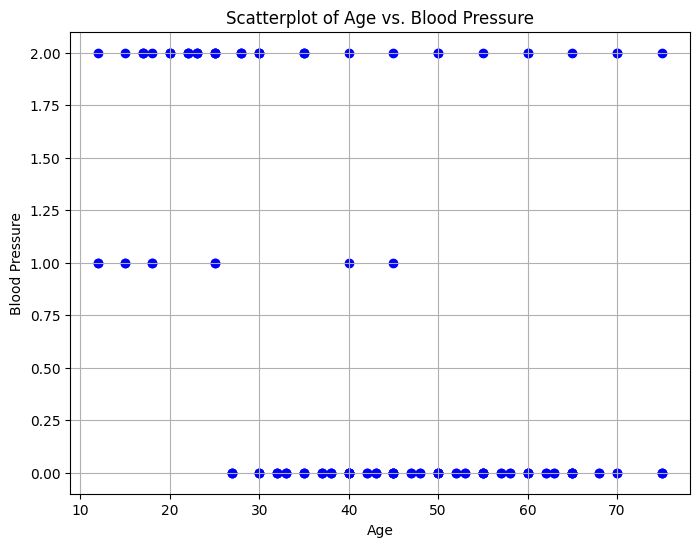

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Blood Pressure'], c='blue', marker='o')
plt.title('Scatterplot of Age vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.grid(True)

# Show the plot
plt.show()

In [10]:
data.dtypes

Age                           int64
Gender                        int32
BMI                           int64
Blood Pressure                int32
FBS                           int64
HbA1c                         int64
Family History of Diabetes    int32
Smoking                       int32
Diet                          int32
Exercise                      int32
Diagnosis                     int32
dtype: object

In [11]:
data.head(8)

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,2,1,1,0,0,0,1,0
1,55,0,30,0,2,2,1,1,1,0,1
2,65,1,35,0,3,3,1,1,1,0,1
3,75,0,40,0,4,4,1,1,1,0,1
4,40,1,20,2,0,0,0,0,0,1,0
5,50,0,25,2,1,1,0,0,0,1,0
6,60,1,30,2,2,2,0,0,0,1,0
7,70,0,35,2,3,3,0,0,0,1,0


In [12]:
data.shape

(128, 11)

In [13]:
data.describe()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,42.031250,0.531250,35.359375,0.687500,4.125000,4.125000,0.398438,0.617188,0.617188,0.382812,0.242188
std,16.783915,0.500983,14.981739,0.911432,3.066199,3.066199,0.491500,0.487983,0.487983,0.487983,0.430091
min,12.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,24.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,34.000000,0.000000,4.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,55.000000,1.000000,45.500000,2.000000,6.250000,6.250000,1.000000,1.000000,1.000000,1.000000,0.000000
max,75.000000,1.000000,67.000000,2.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Define features and target variable
X = data.drop(columns=["Diagnosis"])  # Replace "Diagnosis" with the actual target variable name
y = data["Diagnosis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
X

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise
0,45,1,25,2,1,1,0,0,0,1
1,55,0,30,0,2,2,1,1,1,0
2,65,1,35,0,3,3,1,1,1,0
3,75,0,40,0,4,4,1,1,1,0
4,40,1,20,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
123,17,0,15,2,1,1,0,1,1,0
124,22,1,19,2,2,2,0,1,1,0
125,27,0,24,0,3,3,0,1,1,0
126,32,1,29,0,4,4,0,1,1,0


In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
123    1
124    1
125    1
126    1
127    1
Name: Diagnosis, Length: 128, dtype: int32

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



C:\Users\AAKASH\.conda\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
data.head(5)

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,2,1,1,0,0,0,1,0
1,55,0,30,0,2,2,1,1,1,0,1
2,65,1,35,0,3,3,1,1,1,0,1
3,75,0,40,0,4,4,1,1,1,0,1
4,40,1,20,2,0,0,0,0,0,1,0


In [34]:
new_input = [55,0,30,0,2,2,1,1,1,0]

# Make a prediction
prediction = model.predict([new_input])

# Display the result
if prediction[0] == 0:
    print("diagnosis is not needed")
else:
    print("diagnosis needed")

diagnosis needed


C:\Users\AAKASH\.conda\envs\ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
import pickle


In [21]:
filename='sugar.sav'
pickle.dump(model,open(filename,'wb'))

In [22]:
loaded_model=pickle.load(open('sugar.sav','rb'))